In [1]:
import pandas   as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import ast


In [ ]:
# KMeans clusterization and preprocessing

In [2]:
movies_metadata = pd.read_csv('movies_metadata.csv' , low_memory=False)
movies_metadata



,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [3]:
movies_metadata = movies_metadata.drop_duplicates()

In [4]:

# It's confused row.
# need to delete

movies_metadata[movies_metadata["original_language"] == "104.0"]
movies_metadata = movies_metadata.drop(19730 , axis = 0)

In [5]:
titles = movies_metadata["title"]
titles

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45461                         Subdue
45462            Century of Birthing
45463                       Betrayal
45464               Satan Triumphant
45465                       Queerama
Name: title, Length: 45448, dtype: object

In [6]:
movies_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [7]:
count_of_rows = movies_metadata.shape[0]

In [8]:
def get_part_of_nan(column):
    return movies_metadata[column].isna().sum() / count_of_rows
    

In [9]:
movies_to_analysis = pd.DataFrame()

                                adult

In [10]:

get_part_of_nan("adult")

0.0

In [11]:

movies_to_analysis["adult"] = movies_metadata["adult"]

In [12]:

movies_to_analysis["adult"].value_counts()

False                                                                                                                             45437
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [13]:
# we have a imbalanced data
# column not need

                        belongs_to_collection

In [14]:
get_part_of_nan("belongs_to_collection")

0.9011617672944904

In [15]:

movies_metadata["belongs_to_collection"][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [16]:
# We have 'poster_path' and 'backdrop_path' . 
# Theoretically, we can do an analysis based on posters, but 90% of the data is unknown. 
# Сolumn not required 


                                    budget                    

In [17]:
get_part_of_nan("budget")

0.0

In [18]:
movies_metadata["budget"][movies_metadata["budget"] == "0"].count() / count_of_rows

0.8043698292554128

In [19]:
# 80 % unknown 
# Сolumn not required 


                                        genres

In [20]:
get_part_of_nan("genres")

0.0

In [21]:
movies_metadata["genres"][movies_metadata["genres"] == "[]"].count() / count_of_rows

0.053731737370181304

In [22]:
movies_metadata["genres"]

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45448, dtype: object

In [23]:
dict_genres = dict()
def get_id_genres(line):
    line_list = ast.literal_eval(line)
    genres_id_list = list()
    for i in line_list:
        genres_id_list.append(i["id"])
        dict_genres[i["id"]] = i["name"]
    return genres_id_list


    

In [24]:
movies_to_analysis["genres"]= movies_metadata["genres"].copy().apply( get_id_genres  )
movies_to_analysis

,adult,genres
0,False,"[16, 35, 10751]"
1,False,"[12, 14, 10751]"
2,False,"[10749, 35]"
3,False,"[35, 18, 10749]"
4,False,[35]
...,...,...
45461,False,"[18, 10751]"
45462,False,[18]
45463,False,"[28, 18, 53]"
45464,False,[]


In [25]:
dict_genres

{16: 'Animation',
 35: 'Comedy',
 10751: 'Family',
 12: 'Adventure',
 14: 'Fantasy',
 10749: 'Romance',
 18: 'Drama',
 28: 'Action',
 80: 'Crime',
 53: 'Thriller',
 27: 'Horror',
 36: 'History',
 878: 'Science Fiction',
 9648: 'Mystery',
 10752: 'War',
 10769: 'Foreign',
 10402: 'Music',
 99: 'Documentary',
 37: 'Western',
 10770: 'TV Movie',
 2883: 'Aniplex',
 7759: 'GoHands',
 7760: 'BROSTA TV',
 7761: 'Mardock Scramble Production Committee',
 33751: 'Sentai Filmworks',
 17161: 'Odyssey Media',
 18012: 'Pulser Productions',
 18013: 'Rogue State',
 23822: 'The Cartel'}

                            homepage

In [26]:
get_part_of_nan("homepage")

0.8288373525787713

In [27]:
# 80 % unknown 
# Сolumn not required 



                                    original_language

In [28]:
get_part_of_nan("original_language")

0.0002420348530188347

In [29]:
language_count = movies_metadata["original_language"].value_counts()

In [30]:
language_count



en      32259
fr       2437
it       1529
ja       1350
de       1079
        ...  
la          1
82.0        1
gl          1
cy          1
uz          1
Name: original_language, Length: 91, dtype: int64

In [31]:
movies_to_analysis["original_language"] = movies_metadata["original_language"]

In [32]:
movies_to_analysis

,adult,genres,original_language
0,False,"[16, 35, 10751]",en
1,False,"[12, 14, 10751]",en
2,False,"[10749, 35]",en
3,False,"[35, 18, 10749]",en
4,False,[35],en
...,...,...,...
45461,False,"[18, 10751]",fa
45462,False,[18],tl
45463,False,"[28, 18, 53]",en
45464,False,[],en


                                            overview

In [33]:
get_part_of_nan("overview")

0.02099102270726985

In [34]:
overviews = movies_metadata["overview"]

In [35]:
overviews = overviews.fillna("")

In [36]:
overviews = overviews.str.lower()

In [37]:
import string



for i in string.punctuation:
    overviews = overviews.str.replace(i , "")
    

overviews

<ipython-input-37-cd1363e1e691>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  overviews = overviews.str.replace(i , "")


0        led by woody andys toys live happily in his ro...
1        when siblings judy and peter discover an encha...
2        a family wedding reignites the ancient feud be...
3        cheated on mistreated and stepped on the women...
4        just when george banks has recovered from his ...
                               ...                        
45461           rising and falling between a man and woman
45462    an artist struggles to finish his work while a...
45463    when one of her hits goes wrong a professional...
45464    in a small town live two brothers one a minist...
45465    50 years after decriminalisation of homosexual...
Name: overview, Length: 45448, dtype: object

In [38]:
add_punctuation = ["–" , "’" , "”" , "“"]
for i in add_punctuation:
    overviews = overviews.str.replace(i , "")

In [39]:
import langid
langid.classify(overviews[0])

('en', -745.9035377502441)

In [40]:
def delete_not_eng_overviews(row):
    if langid.classify(row)[0] != "en":
        return ''
    return row

In [41]:
eng_overviews = overviews.copy().apply( delete_not_eng_overviews  )
eng_overviews

0        led by woody andys toys live happily in his ro...
1        when siblings judy and peter discover an encha...
2        a family wedding reignites the ancient feud be...
3        cheated on mistreated and stepped on the women...
4        just when george banks has recovered from his ...
                               ...                        
45461           rising and falling between a man and woman
45462    an artist struggles to finish his work while a...
45463    when one of her hits goes wrong a professional...
45464    in a small town live two brothers one a minist...
45465    50 years after decriminalisation of homosexual...
Name: overview, Length: 45448, dtype: object

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [43]:
unicode_overview = eng_overviews.values.astype('U')

In [44]:
unicode_overview

array(['led by woody andys toys live happily in his room until andys birthday brings buzz lightyear onto the scene afraid of losing his place in andys heart woody plots against buzz but when circumstances separate buzz and woody from their owner the duo eventually learns to put aside their differences',
       'when siblings judy and peter discover an enchanted board game that opens the door to a magical world they unwittingly invite alan  an adult whos been trapped inside the game for 26 years  into their living room alans only hope for freedom is to finish the game which proves risky as all three find themselves running from giant rhinoceroses evil monkeys and other terrifying creatures',
       'a family wedding reignites the ancient feud between nextdoor neighbors and fishing buddies john and max meanwhile a sultry italian divorcée opens a restaurant at the local bait shop alarming the locals who worry shell scare the fish away but shes less interested in seafood than she is in coo

In [45]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(unicode_overview)

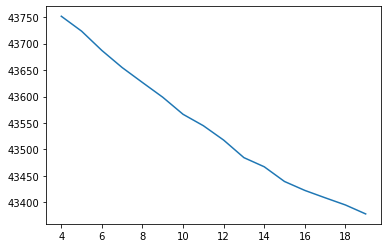

In [46]:
k = range(4,20)
models = [KMeans(n_clusters = i, random_state = 42 , init='k-means++', max_iter=1000, n_init=1).fit(features) for i in k]
dist = [m.inertia_ for m in models]

plt.plot(k, dist)

In [47]:
optimal_count_clusters = 8
optimal_KMeans_model = models[ optimal_count_clusters -k[0]]

In [48]:
order_centroids = optimal_KMeans_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(optimal_count_clusters):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster 0:
 film
 documentary
 story
 directed
 director
 based
 movie
 world
 life
 feature
------------
Cluster 1:
 mother
 father
 son
 young
 daughter
 boy
 girl
 home
 death
 years
------------
Cluster 2:
 family
 home
 life
 young
 new
 man
 son
 house
 story
 father
------------
Cluster 3:
 love
 falls
 young
 story
 fall
 girl
 woman
 life
 meets
 man
------------
Cluster 4:
 life
 new
 story
 world
 young
 years
 time
 man
 day
 finds
------------
Cluster 5:
 new
 world
 young
 story
 group
 war
 friends
 school
 time
 years
------------
Cluster 6:
 man
 woman
 young
 husband
 wife
 finds
 story
 new
 old
 death
------------
Cluster 7:
 town
 police
 small
 murder
 killer
 detective
 serial
 case
 cop
 new
------------


In [49]:
movies_to_analysis["overview"] =   optimal_KMeans_model.labels_
movies_to_analysis["overview"]

0        5
1        5
2        2
3        5
4        5
        ..
45461    6
45462    5
45463    5
45464    7
45465    5
Name: overview, Length: 45448, dtype: int32

In [50]:
                                            popularity

NameError: name 'popularity' is not defined

In [ ]:
get_part_of_nan("popularity")

In [ ]:
movies_metadata["popularity"]

In [ ]:
movies_to_analysis["popularity"] = movies_metadata["popularity"]

In [ ]:
movies_to_analysis["popularity"] = pd.to_numeric(movies_to_analysis["popularity"], errors='coerce')

In [ ]:
movies_metadata.dtypes

In [ ]:
                                           poster_path               

In [ ]:
get_part_of_nan("poster_path")

In [ ]:
movies_metadata["poster_path"]

                                production_companies      

In [ ]:
get_part_of_nan("production_companies")

In [ ]:
movies_metadata["production_companies"][1]

In [ ]:
dict_companies = dict()

def get_id_companies (line):
    try:
        line_list = ast.literal_eval(line)
        companies_id_list = list()
        for i in line_list:
            companies_id_list.append(i["id"])
            dict_companies[i["id"]] = i["name"]
        return companies_id_list
    except (ValueError , TypeError):
        return list()
    
    

In [ ]:
movies_to_analysis["production_companies"]= movies_metadata["production_companies"].copy().apply( get_id_companies  )
movies_to_analysis

In [ ]:
dict_companies

                                    production_countries      

In [ ]:
get_part_of_nan("production_countries")

In [ ]:
movies_metadata["production_countries"][24345]

In [ ]:
dict_countries = dict()

def get_id_countries(line):
    try :
        line_list = ast.literal_eval(line)
        countries_id_list = list()
        for i in line_list:
            countries_id_list.append(i["iso_3166_1"])
            dict_countries[i["iso_3166_1"]] = i["name"]
        return countries_id_list
    except (ValueError , TypeError):
        return list()

In [ ]:
movies_to_analysis["production_countries"]= movies_metadata["production_countries"].copy().apply( get_id_countries  )
movies_to_analysis

In [ ]:
dict_countries

In [ ]:
                                    release_date              

In [ ]:
get_part_of_nan("release_date")

In [ ]:
movies_to_analysis["release_date"] = pd.to_datetime(movies_metadata["release_date"] ,  errors='coerce')

In [ ]:
                                   revenue                  

In [ ]:
get_part_of_nan("revenue")

In [ ]:
movies_metadata["revenue"]

In [ ]:
movies_metadata["revenue"][movies_metadata["revenue"] == 0].count() / count_of_rows
# not need

In [ ]:
                                runtime                  

In [ ]:
get_part_of_nan("runtime")

In [ ]:
movies_metadata["runtime"]

In [ ]:
movies_metadata["runtime"][movies_metadata["runtime"] == 0].count() / count_of_rows


In [ ]:
movies_to_analysis["runtime"] = movies_metadata["runtime"].copy()

In [ ]:
                                    spoken_languages

In [ ]:
get_part_of_nan("spoken_languages")

In [ ]:
movies_metadata["spoken_languages"]

In [ ]:
movies_metadata["spoken_languages"][movies_metadata["spoken_languages"] == "[]"].count() / count_of_rows

In [ ]:
dict_spoken_languages = dict()

def get_id_spoken_languages(line):
    try :
        line_list = ast.literal_eval(line)
        spoken_languages_id_list = list()
        for i in line_list:
            spoken_languages_id_list.append(i["iso_639_1"].upper())
            dict_spoken_languages[i["iso_639_1"]] = i["name"]
        return spoken_languages_id_list
    except (ValueError , TypeError):
        return list()

In [ ]:
movies_to_analysis["spoken_languages"]= movies_metadata["spoken_languages"].copy().apply( get_id_spoken_languages  )
movies_to_analysis

In [ ]:
dict_countries

In [ ]:
                                    status

In [ ]:
get_part_of_nan("status")

In [ ]:
movies_metadata["status"].value_counts()

In [ ]:
movies_to_analysis["status"] = movies_metadata["status"].copy()

In [ ]:
                                            tagline

In [ ]:
get_part_of_nan("tagline")
# not need

In [ ]:
                                            video

In [ ]:
get_part_of_nan("video")

In [ ]:
movies_metadata["video"].value_counts()


In [ ]:
# Imbalanced Data

In [ ]:
                                    vote_average

In [ ]:
get_part_of_nan("vote_average")

In [ ]:
movies_metadata["vote_average"].dtype


In [ ]:
movies_to_analysis["vote_average"] = movies_metadata["vote_average"].copy()
movies_to_analysis["vote_average"] 

In [ ]:
                                    vote_count

In [ ]:
get_part_of_nan("vote_count")

In [ ]:
movies_metadata["vote_count"].dtype

In [ ]:
movies_to_analysis["vote_count"] = movies_metadata["vote_count"].copy()
movies_to_analysis["vote_count"] 

In [ ]:
movies_to_analysis

In [ ]:
categorical_data = movies_to_analysis[["genres" , "original_language", "overview" , "production_companies", "production_countries"
                                     , "spoken_languages" ] ]
categorical_data

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb_genres = MultiLabelBinarizer()
genres_dummies = pd.DataFrame(mlb_genres.fit_transform(categorical_data["genres" ]),columns=mlb_genres.classes_, index=categorical_data.index)
genres_dummies

In [ ]:
genres_dummies = genres_dummies.add_prefix('genre_')

In [ ]:
genres_dummies

In [ ]:
genres_dummies_clear = genres_dummies.loc[: , genres_dummies.sum() != 1]
genres_dummies_clear

In [ ]:
genres_dummies_clear.sum()

In [ ]:
mlb_countries = MultiLabelBinarizer()
countries_dummies = pd.DataFrame(mlb_countries.fit_transform(categorical_data["production_countries" ]),columns=mlb_countries.classes_, index=categorical_data.index)
countries_dummies

In [ ]:
countries_dummies = countries_dummies.add_prefix('country_')
countries_dummies

In [ ]:
original_language_dummies = categorical_data["original_language"].str.get_dummies()
original_language_dummies

In [ ]:
original_language_dummies.sum()

In [ ]:
original_language_dummies_clear = original_language_dummies.loc[: , original_language_dummies.sum() != 1]

In [ ]:

overview_dummies = pd.get_dummies(categorical_data["overview"].astype(str) , prefix='overview_cluster')
overview_dummies

In [ ]:
categorical_feachues = pd.concat([overview_dummies, original_language_dummies_clear , countries_dummies , genres_dummies_clear] , axis=1)
categorical_feachues

In [ ]:
k = range(4,10)
models = [KMeans(n_clusters = i, random_state = 42 , init='k-means++', max_iter=1000, n_init=1).fit(categorical_feachues) for i in k]
dist = [m.inertia_ for m in models]

plt.plot(k, dist)

In [ ]:
optimal_count_clusters = 7
optimal_KMeans_model = models[ optimal_count_clusters -k[0]]

In [ ]:
result  = optimal_KMeans_model.labels_

In [ ]:
len(result)

In [ ]:
len(titles)

In [ ]:
result_df  =  pd.concat([titles ,pd.Series(result , name = "cluster" , index=titles.index) ] , axis=1)
result_df

In [ ]:
result_df